# Advertising - Logistic Regression

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Data features:
- Daily time spent on site: in minutes
- Age
- Area Income: Average income of the geographical area of the customer
- Daily Internet Usage: minutes a day
- Ad Topic Line: headline of the advertisement
- City
- Male
- Country
- Timestamp: Time at which the consumer clicked on Ad or closed the window

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

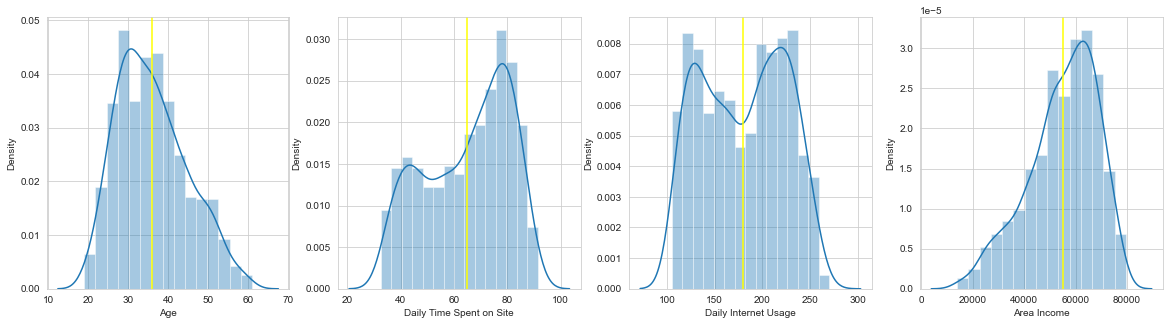

In [8]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(ncols=4, figsize=(20,5))
sns.distplot(ad_data['Age'], bins=15, ax=axs[0])
axs[0].axvline(ad_data['Age'].mean(), color='yellow')
sns.distplot(ad_data['Daily Time Spent on Site'], bins=15, ax=axs[1])
axs[1].axvline(ad_data['Daily Time Spent on Site'].mean(), color='yellow')
sns.distplot(ad_data['Daily Internet Usage'], bins=15, ax=axs[2])
axs[2].axvline(ad_data['Daily Internet Usage'].mean(), color='yellow')
sns.distplot(ad_data['Area Income'], bins=15, ax=axs[3])
axs[3].axvline(ad_data['Area Income'].mean(), color='yellow')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.1826049550326215


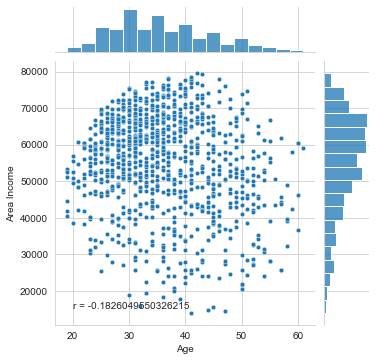

In [35]:
def make_plot(column1, column2):
    g = sns.jointplot(ad_data[column1],ad_data[column2], s=20)
    r,_ = stats.pearsonr(ad_data[column1],ad_data[column2])
    print(r)
    g.ax_joint.annotate(text='r = {}'.format(r), xy=(20,15000))
    g.fig.set_size_inches((5,5))
    plt.show()


make_plot('Age', 'Area Income')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.33151334278658395


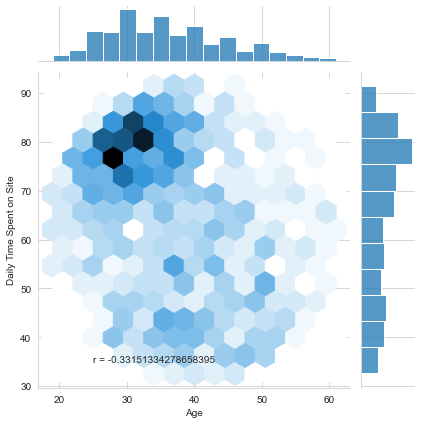

In [33]:
def make_plot(column1, column2):
    g = sns.jointplot(column1,column2, data=ad_data, kind='hex')
    r,p=stats.pearsonr(ad_data[column1],ad_data[column2] )
    print(r)
    g.ax_joint.annotate(text='r = {}'.format(r), xy=(25,35))
    #g.fig.set_size_inches((5,5))
    plt.show()


make_plot('Age', 'Daily Time Spent on Site')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.518658475337186


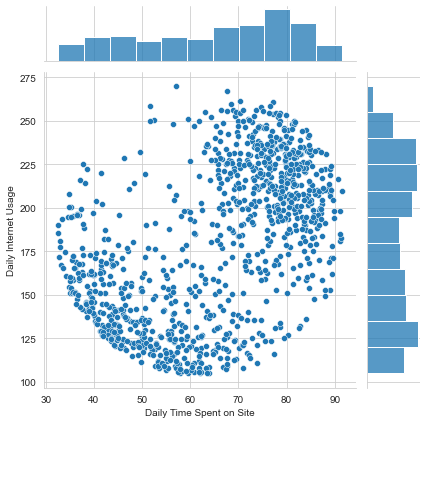

In [38]:
def make_plot(column1, column2):
    g = sns.jointplot(column1,column2, data=ad_data)
    r,p=stats.pearsonr(ad_data[column1],ad_data[column2] )
    print(r)
    g.ax_joint.annotate(text='r = {}'.format(r), xy=(25,35))
    #g.fig.set_size_inches((5,5))
    plt.show()


make_plot('Daily Time Spent on Site', 'Daily Internet Usage')

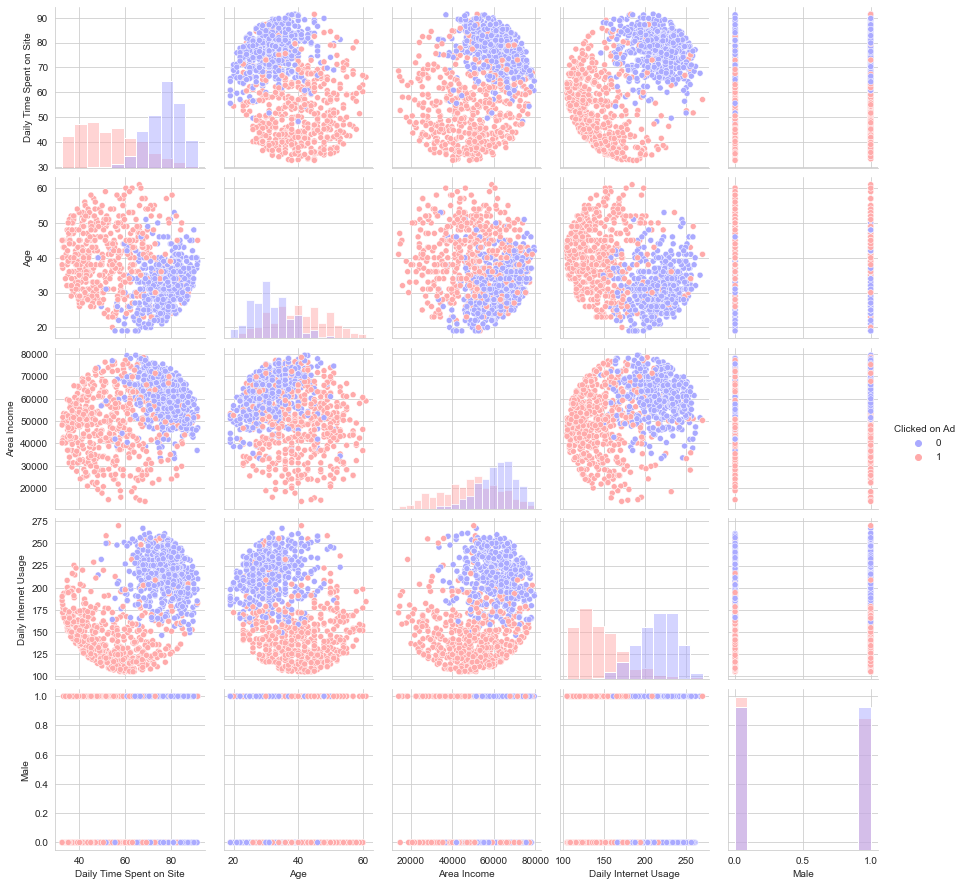

In [37]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',diag_kind='hist',palette='bwr')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

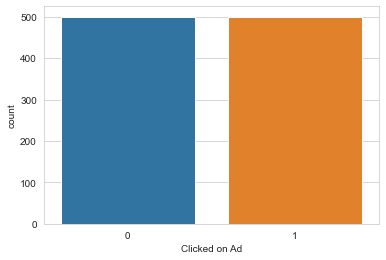

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data=ad_data,)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

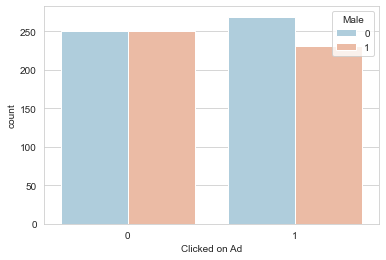

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='Male',data=ad_data,palette='RdBu_r')

### New features

- Day of Week
- Time of day
- Make something with ad topic 

In [48]:
import datetime as dt
ad_data['Day of week'] = ad_data['Timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').isoweekday())

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

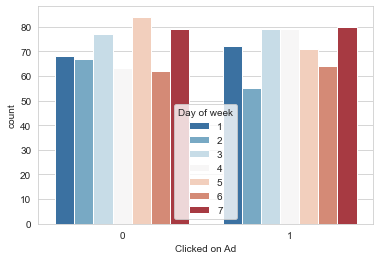

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='Day of week',data=ad_data,palette='RdBu_r')

In [92]:
ad_data['is_weekend'] = ad_data['Day of week'].apply(lambda x: 1 if x in [6,7] else 0)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

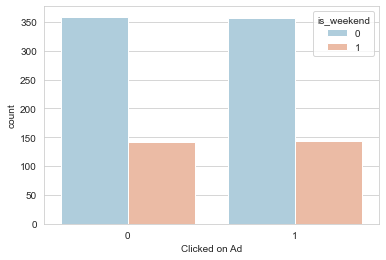

In [93]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='is_weekend',data=ad_data,palette='RdBu_r')

It does not seam relevant for the result

In [53]:
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

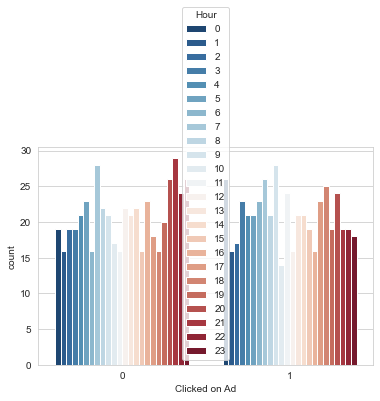

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='Hour',data=ad_data,palette='RdBu_r')

In [94]:
ad_data['is_night']= ad_data['Hour'].apply(lambda x: 1 if x in [22, 23, 0, 1, 2, 3, 4, 5, 6, 7] else 0)


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

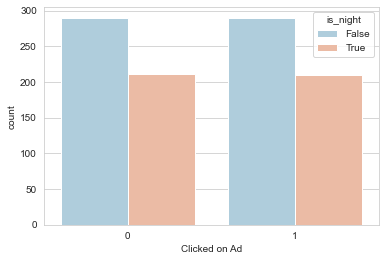

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='is_night',data=ad_data,palette='RdBu_r')

It does not seem to have an effect on the clicks

In [65]:
ad_data['Ad Topic Line'].apply(lambda x: 'Free' in x.split(' ')).any()

False

I can't find any words that would make people more lickely to click on ads...

In [64]:
ad_data['Ad Topic Line']

0         Cloned 5thgeneration orchestration
1         Monitored national standardization
2           Organic bottom-line service-desk
3      Triple-buffered reciprocal time-frame
4              Robust logistical utilization
                       ...                  
995            Fundamental modular algorithm
996          Grass-roots cohesive monitoring
997             Expanded intangible solution
998     Proactive bandwidth-monitored policy
999          Virtual 5thgeneration emulation
Name: Ad Topic Line, Length: 1000, dtype: object

#### Logistic Regression

In [99]:
X_1 = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y_1 = ad_data['Clicked on Ad']

In [105]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=101)

In [106]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train_1,y_train_1)

LogisticRegression()

In [107]:
logmodel_1.coef_

array([[-5.12426791e-02,  2.36157646e-01, -9.89647744e-06,
        -2.46826887e-02,  1.07736310e-03]])

In [108]:
predictions_1 = logmodel_1.predict(X_test_1)

In [109]:
print(classification_report(y_test_1,predictions_1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [110]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=101)
mm_scaler = preprocessing.StandardScaler()
X_train_1_scaled = mm_scaler.fit_transform(X_train_1)
X_test_1_scaled = mm_scaler.transform(X_test_1)

In [113]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train_1_scaled,y_train_1)
print(list(X_train_1.columns))
print(logmodel_1.coef_)
predictions_1 = logmodel_1.predict(X_test_1_scaled)
print(classification_report(y_test_1,predictions_1))

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
[[-2.41426002  1.09528998 -1.39227131 -2.29773002 -0.2224359 ]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



The results improve a lot when standerdizing the features.
When looking at the default parameters of the logistic reggretion, l2 penalty is used.
So it makes sence that the results would differ.

Try adding hour and day of week

In [95]:
X_2 = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male', 'is_night', 'is_weekend']]
y_2 = ad_data['Clicked on Ad']

In [114]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=101)
mm_scaler2 = preprocessing.StandardScaler()
X_train_2_scaled = mm_scaler2.fit_transform(X_train_2)
X_test_2_scaled = mm_scaler2.transform(X_test_2)
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train_2_scaled,y_train_2)
predictions_2 = logmodel_2.predict(X_test_2_scaled)
print(classification_report(y_test_2,predictions_2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



No difference as expected